In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
import scipy
from scipy.signal import find_peaks
import pandas as pd


maxdose=20
all_data={}
for j in [20]:
    my_array=np.zeros((300,300,100))
    data03=pd.read_csv("D:Desktop/thesis/linac/results/dosetomedium_linac_SFRT_waterphantom"+str(j)+"MeV__1.csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
    for i in np.arange(2,11):
        data1=pd.read_csv("D:Desktop/thesis/linac/results/dosetomedium_linac_SFRT_waterphantom"+str(j)+"MeV__"+str(i)+".csv",delimiter= ',',comment='#',names=['x','y','z','dose'])
        data03.dose+= data1.dose
    data03.dose=data03.dose/(1.60218e-19)/5
    for i in np.arange(0,len(data03.x)):
        my_array[data03.x[i]][data03.y[i]][data03.z[i]]=data03.dose[i]
    all_data[j]=np.array(my_array)



(7.0, 23.0)

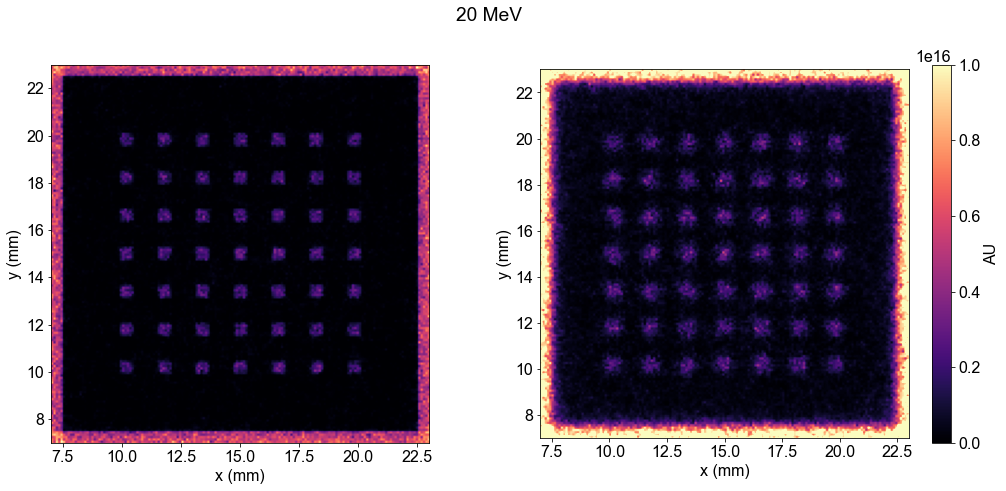

In [13]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)

y= np.arange(0,300)*0.1+0.1/2
x= np.arange(0,300)*0.1+0.1/2
z= np.arange(0,100)*0.5+0.5/2

#all_data[20]=all_data[20]*6e7
maxdose=1


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))
plt.set_cmap('magma')
im1=ax1.imshow(all_data[20][:,:,0],extent=(0,300*0.1,0,300*0.1),vmax=1e16)
ax2.imshow((all_data[20][:,:,9]+all_data[20][:,:,10])/2,extent=(0,300*0.1,0,300*0.1),vmax=0.5e16)
ax1.set_ylabel('y (mm)')
ax1.set_xlabel('x (mm)')
ax2.set_ylabel('y (mm)')
ax2.set_xlabel('x (mm)')
fig.colorbar(im1,ax=ax2,label='AU')
fig.suptitle('20 MeV')
fig.tight_layout()
ax1.set_xlim(7,23)
ax1.set_ylim(7,23)
ax2.set_xlim(7,23)
ax2.set_ylim(7,23)

In [66]:
font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 16}

matplotlib.rc('font', **font)


20MV 17 mm
914.4344372506138 857.1205142675888


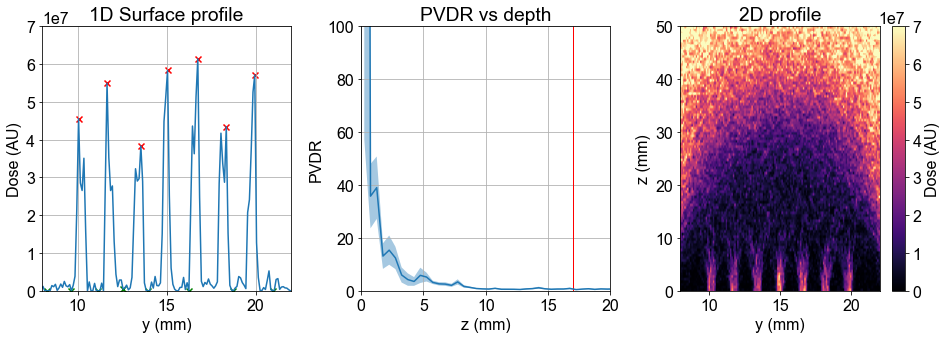

In [78]:
leftedge=80
rightedge=220
xslice=150
maxdose=70000000
zentry=0

y= np.arange(0,300)*0.1+0.1/2
x= np.arange(0,300)*0.1+0.1/2
z= np.arange(0,100)*0.5+0.5/2

for i in [20]:
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13.5,5))
    im1=ax3.imshow(all_data[i][150].T, aspect='auto',extent=(0,300*0.1,0,100*0.5),cmap='magma',origin='lower',vmax=maxdose)
    ax3.set_ylabel('z (mm)')
    ax3.set_xlabel('y (mm)')
    ax3.set_xlim((leftedge*0.1,rightedge*0.1))
    #ax3.set_ylim((0,60))
    fig.colorbar(im1,label='Dose (AU)')
    ax3.set_title('2D profile')
    
    
    ax1.plot(y,(all_data[i][xslice,:,zentry]))
    ax1.set_ylim((0,maxdose))
    ax1.set_xlim((leftedge*0.1,rightedge*0.1))
    ax1.set_ylabel('Dose (AU)')
    ax1.set_xlabel('y (mm)')
    ax1.grid()
    
    
    peaks= find_peaks(all_data[i][xslice,leftedge:rightedge,zentry],height=3e7,distance=5)[0]
    valleys= find_peaks(-all_data[i][xslice,leftedge:rightedge,zentry],distance=12)[0]
    ax1.scatter(y[leftedge+peaks],all_data[i][xslice,leftedge+peaks,zentry],marker='x',c='red')
    ax1.scatter(y[leftedge+valleys],all_data[i][xslice,leftedge+valleys,zentry],marker='x',c='green')
    ax1.set_title('1D Surface profile')

    pvdr_depth=[]
    mean_peaks=[]
    mean_valleys=[]
    peak_error=[]
    valley_error=[]
    pvdr_error=[]
    for j in np.arange(0,100):
        mean_peaks.append(np.mean(all_data[i][xslice,leftedge+peaks,j]))
        mean_valleys.append(np.mean(all_data[i][xslice,leftedge+valleys,j]))
        peak_error.append(np.std(all_data[i][xslice,leftedge+peaks,j])/np.sqrt(len(all_data[i][xslice,leftedge+peaks,j])))
        valley_error.append(np.std(all_data[i][xslice,leftedge+valleys,j])/np.sqrt(len(all_data[i][xslice,leftedge+valleys,j])))
    pvdr_depth=[mean_peaks[k]/mean_valleys[k] for k in np.arange(0,len(mean_valleys))]
    pvdr_error=np.sqrt((np.array(peak_error)/np.array(mean_peaks))**2+(np.array(valley_error)/np.array(mean_valleys))**2)*pvdr_depth
    n=1
    mean_peaks_avg=[sum(mean_peaks[k:k+n])/n for k in range(0,len(mean_peaks),n)]
    mean_valleys_avg=[sum(mean_valleys[k:k+n])/n for k in range(0,len(mean_valleys),n)]
    pvdr_depth_avg=[mean_peaks_avg[k]/mean_valleys_avg[k] for k in np.arange(0,len(mean_valleys_avg))]
    z_avg=[sum(z[k:k+n])/n for k in range(0,len(z),n)]
    ax2.plot(z_avg,pvdr_depth_avg,label=str(i)+'MV',alpha=1)
    ax2.fill_between(z_avg, pvdr_depth_avg-pvdr_error, pvdr_depth+pvdr_error,alpha=0.4)
    ax2.grid()
    ax2.set_ylim((0,41))
    ax2.set_title("PVDR vs depth")
    ax2.set_ylabel('PVDR')
    ax2.set_xlabel('z (mm)')
    DOC= [w*n for w in np.arange(0,len(pvdr_depth_avg)) if np.max(pvdr_depth_avg[w:w+5]-pvdr_error[w:w+5])<=1.1][0]
    print(str(i)+'MV '+str(DOC)+' mm')
    DOC_energy.append(DOC)
    pvdr_energy.append(np.max(pvdr_depth_avg))
    ax2.vlines(DOC,0,100,colors='red',lw=1)
    ax2.set_ylim(0,100)
    ax2.set_xlim(0,20)
    print(pvdr_depth_avg[0],pvdr_error[0])
    fig.tight_layout()
    if i==150:
        peakPDD150=mean_peaks_avg

NameError: name 'DOC_energy' is not defined

<Figure size 576x576 with 0 Axes>

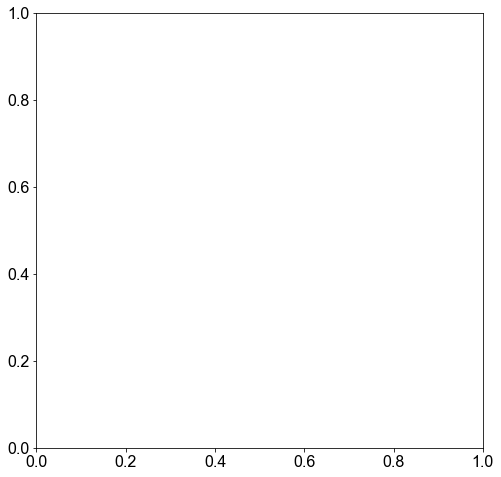

In [4]:
def align_y_axis(ax1, ax2, minresax1, minresax2,numticks):
    """ Sets tick marks of twinx axes to line up with x total tick marks

    ax1 and ax2 are matplotlib axes
    Spacing between tick marks will be a factor of minresax1 and minresax2"""

    ax1ylims = ax1.get_ybound()
    ax2ylims = ax2.get_ybound()
    ax1factor = minresax1 * (numticks-1)
    ax2factor = minresax2 * (numticks-1)
    ax1.set_yticks(np.linspace(ax1ylims[0],
                               ax1ylims[1]+(ax1factor -
                               (ax1ylims[1]-ax1ylims[0]) % ax1factor) %
                               ax1factor,
                               numticks))
    ax2.set_yticks(np.linspace(ax2ylims[0],
                               ax2ylims[1]+(ax2factor -
                               (ax2ylims[1]-ax2ylims[0]) % ax2factor) %
                               ax2factor,
                               numticks))

energy=np.arange(100,250+1,10)


figure(1,figsize=(8,8))
fig, ax1=plt.subplots(figsize=(8,8))
plt.plot(np.arange(100,250+1,10),DOC_energy,marker='o',label='Depth of convergence',markersize=9,c='tab:orange')
plt.ylabel('Depth of convergence (mm)',c='tab:orange')
plt.xlabel('Energy (MeV)')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
ax2=ax1.twinx()
#plt.plot(np.arange(100,250,10),pvdr_energy,marker='o',markersize=9,label='PVDR')
#plt.ylabel('PVDR',c='tab:blue')
plt.grid(c='lightgray',axis='both',ls='--')
plt.ylim(bottom=0)
fig.legend(loc="upper center", bbox_to_anchor=(0.5,0.8455))
plt.title('Depth test results (water)')

align_y_axis(ax1,ax2,5,5,6)

In [ ]:
figure(3,figsize=(8,8))
plt.plot(z,mean_peaks_avg,label='SFRT 250 MeV')
plt.plot(z,peakPDD150,label='SFRT 150 MeV')
plt.grid()
plt.xlim(0,100)
plt.ylim()
plt.xlabel('Depth (mm)')
plt.ylabel('Dose rate (Gy/s)')
plt.legend()